In [1]:
pip install lazypredict

In [2]:
pip install --upgrade scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import lazypredict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #, plot_confusion_matrix

In [8]:
dataset= pd.read_csv('/content/framingham.csv')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
dataset.shape

(4240, 16)

In [10]:
dataset.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
dataset.isna().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
dataset.dropna(inplace=True)

In [13]:
dataset['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

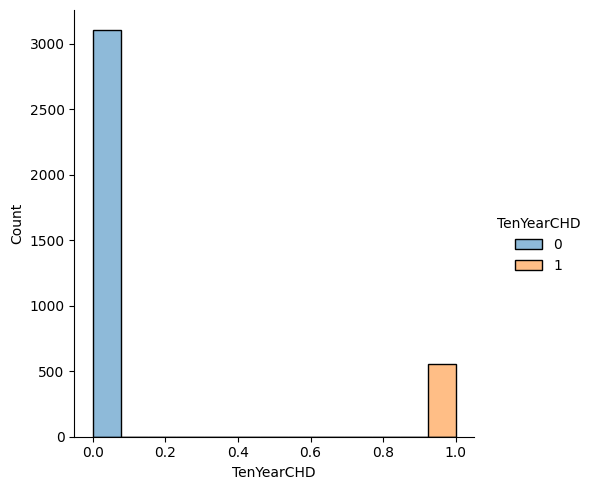

In [14]:
sn.displot(dataset, x="TenYearCHD", hue='TenYearCHD')

In [15]:
noo_stroke = dataset.loc[dataset['TenYearCHD'] == 0].sample(n = 557)
stroke = dataset.loc[dataset['TenYearCHD'] == 1]
frames = [stroke,noo_stroke]
new_data = pd.concat(frames)

In [16]:
new_data.shape

(1114, 16)

In [17]:
new_data['TenYearCHD'].value_counts()

1    557
0    557
Name: TenYearCHD, dtype: int64

In [18]:
new_data=new_data.sample(n = 1114)

In [19]:
new_data[0:8]

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2746,0,45,3.0,1,10.0,0.0,0,0,0,210.0,121.0,82.0,23.08,85.0,71.0,1
3714,1,53,2.0,0,0.0,0.0,0,1,0,198.0,142.5,82.0,23.84,57.0,78.0,1
929,0,53,1.0,1,5.0,0.0,0,0,0,247.0,139.0,88.0,23.71,60.0,53.0,1
2875,1,41,2.0,1,20.0,0.0,0,0,0,264.0,126.5,82.0,23.96,75.0,78.0,1
2863,0,43,2.0,0,0.0,0.0,0,0,0,194.0,122.5,82.0,35.16,75.0,80.0,0
411,0,60,3.0,0,0.0,0.0,0,1,0,285.0,156.0,100.0,23.02,80.0,85.0,0
3070,0,41,1.0,1,5.0,0.0,0,0,0,192.0,123.0,72.0,19.16,62.0,90.0,1
1534,1,54,3.0,1,29.0,0.0,0,0,0,211.0,120.0,72.0,25.13,77.0,60.0,0


<ipython-input-20-540225cebea0>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))


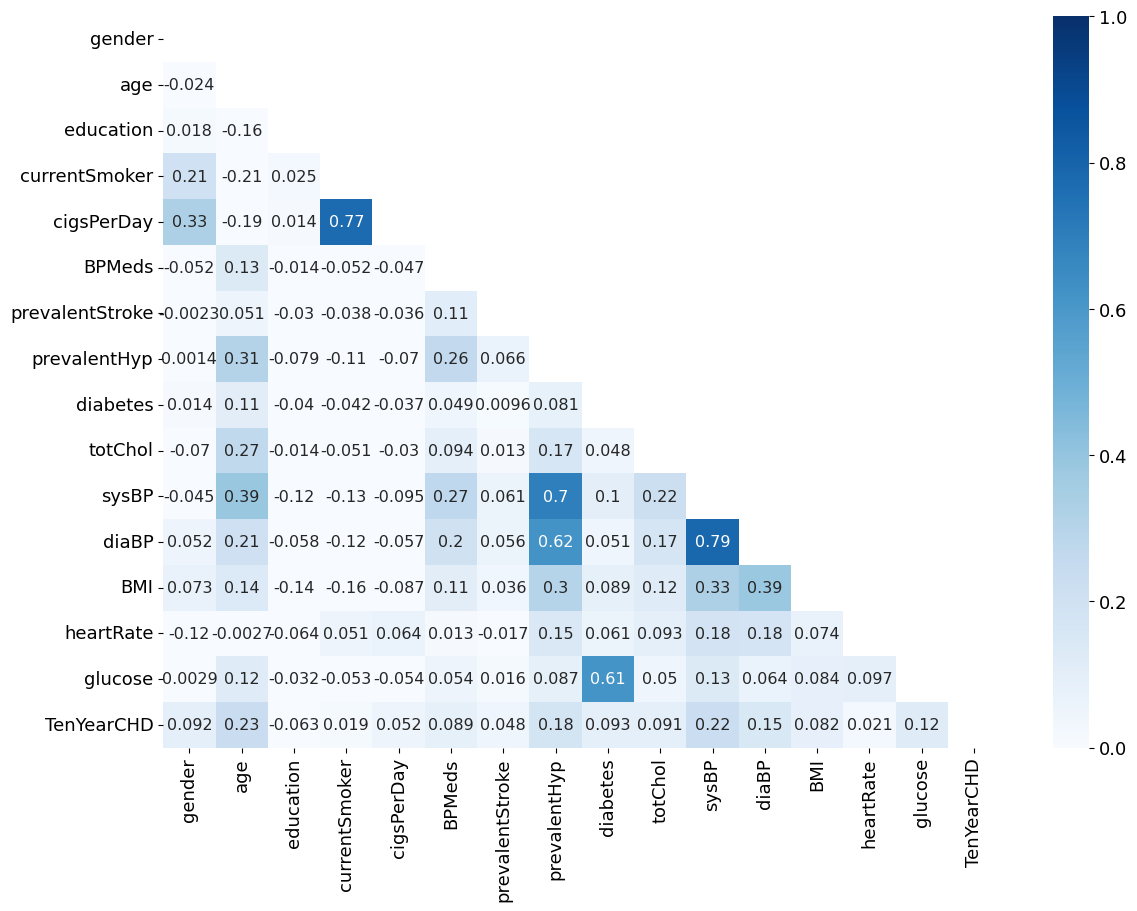

In [20]:
plt.rc('xtick', labelsize=13)   # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  # fontsize of the tick labels
plt.figure(figsize=(13.5, 9.5))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
heatmap = sn.heatmap(dataset.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='Blues', annot_kws={"size": 11.5})

In [21]:
predictors= new_data.iloc[:, 1:15]
labels= new_data.iloc[:,-1]
x_train, x_test, y_train, y_test= train_test_split(predictors, labels, test_size=0.2)

In [22]:
data= new_data[['age', 'prevalentHyp', 'sysBP' ,	'diaBP', 'glucose', 'TenYearCHD']]
predictors1= data.iloc[:, 0:5]
labels1= data.iloc[:,-1]
x_trainn, x_testt, y_trainn, y_testt= train_test_split(predictors1, labels1, test_size=0.2)

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [24]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(x_train, y_train)

In [25]:
from numpy import set_printoptions
set_printoptions(precision=2)
print(np.round(fit.scores_))
features = fit.transform(x_train)
# summarize selected features
print(features[0:5,:])

[78.  7.  7. 12. 14.  1. 29.  7. 17. 44. 15.  3.  1. 12.]
[[ 38.    0.  248.  110. ]
 [ 59.    0.  250.  127.5]
 [ 54.    0.  230.  145. ]
 [ 51.    0.  216.  112. ]
 [ 62.    0.  217.  107.5]]


<BarContainer object of 14 artists>

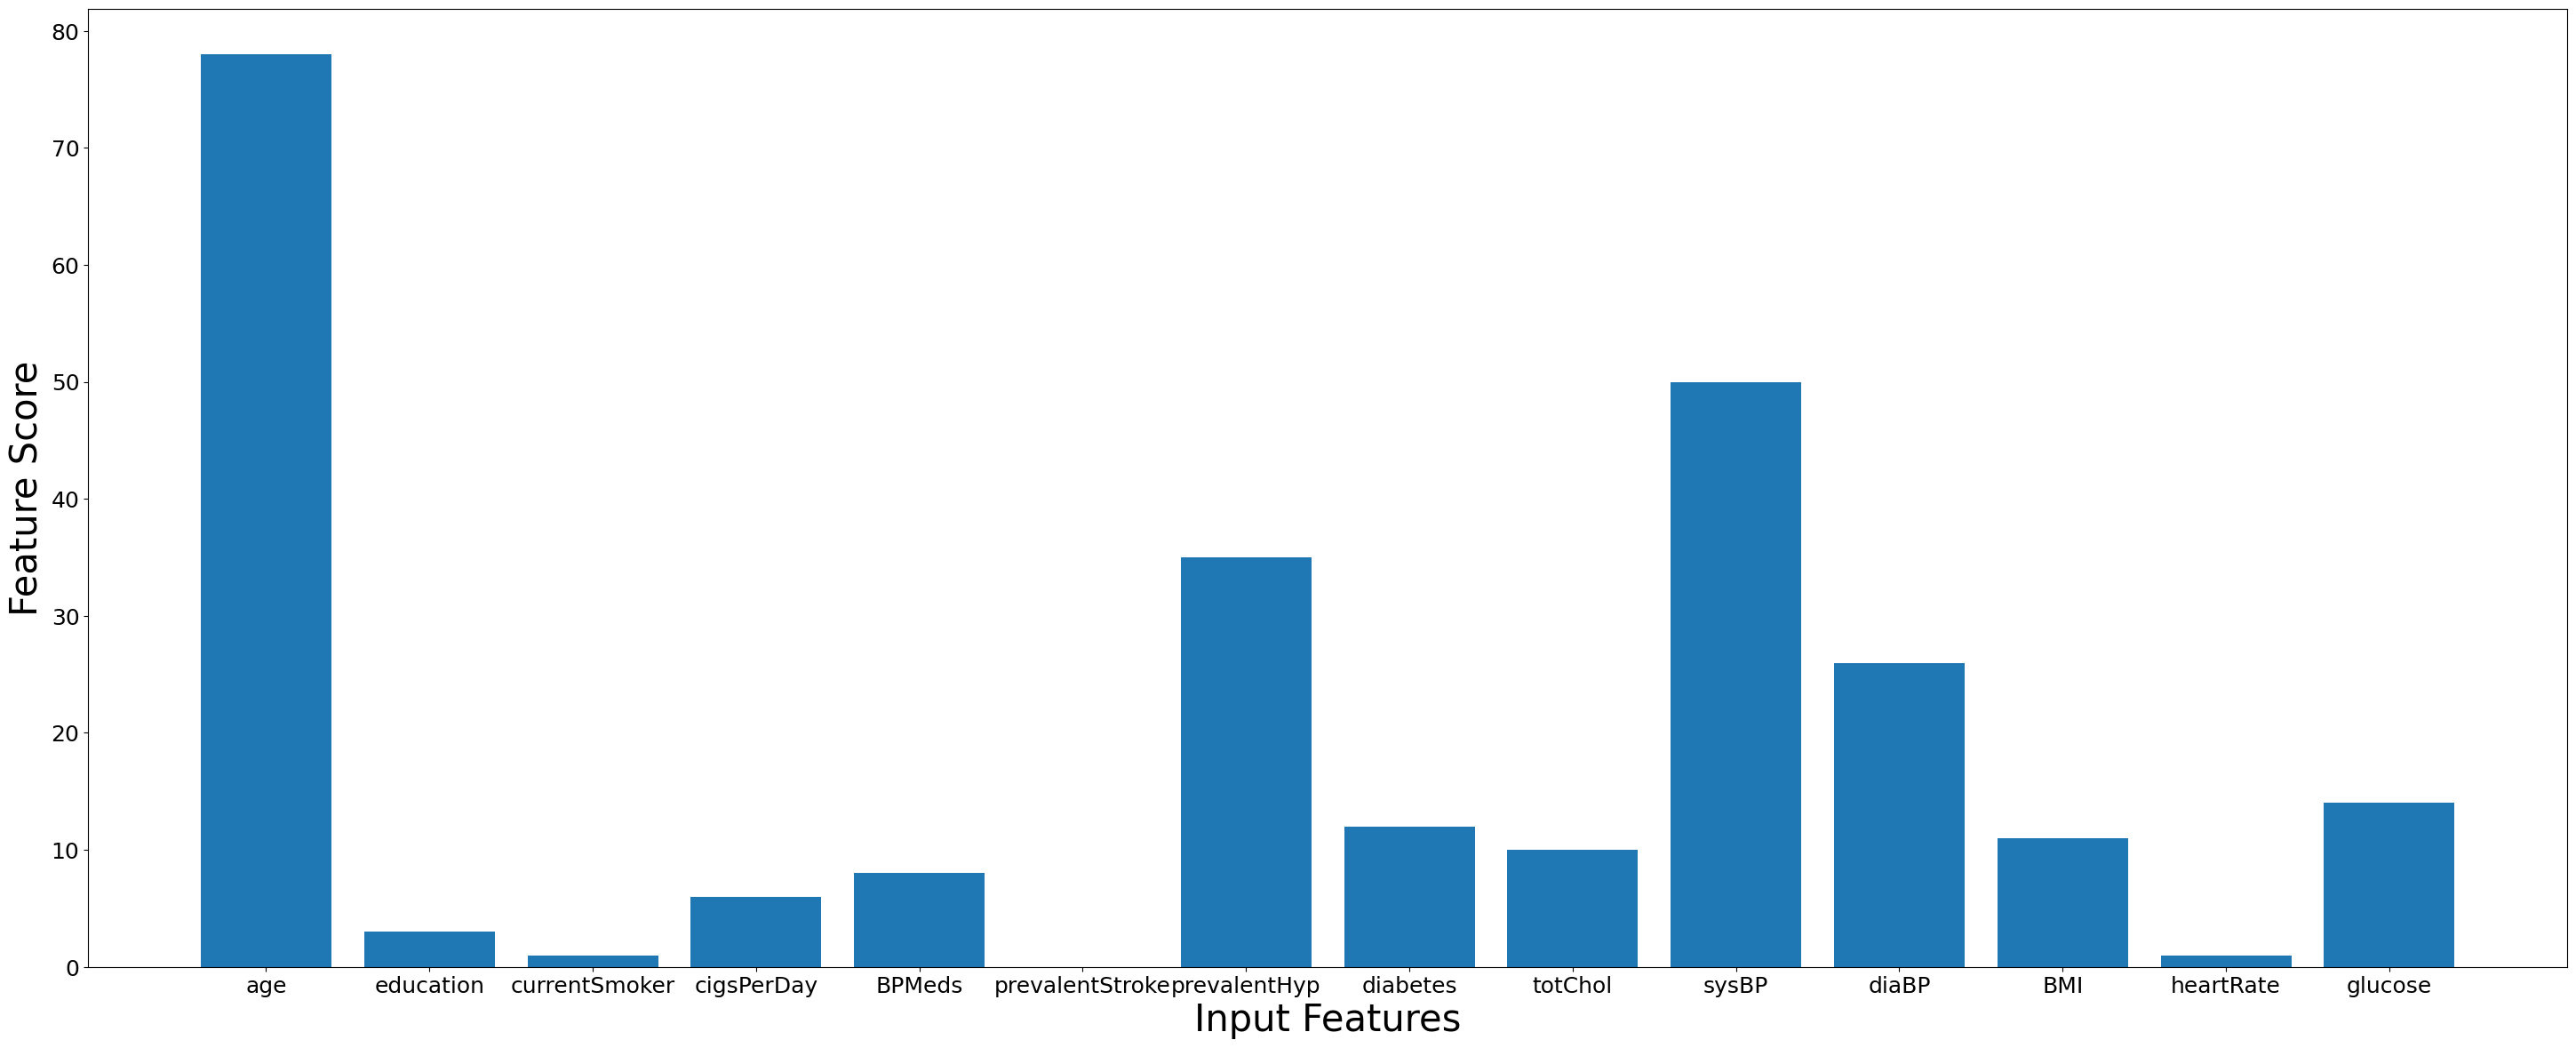

In [26]:
from matplotlib import rcParams
data=[78,  3,  1,  6,  8,  0, 35, 12, 10, 50, 26, 11,  1, 14]
labelsize=18
rcParams['xtick.labelsize']= labelsize
rcParams['ytick.labelsize']= labelsize
plt.figure(figsize =(36, 14))
labels = ['age',	'education',	'currentSmoker',	'cigsPerDay',	'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose']
#labels = X.columns
plt.xlabel('Input Features', fontsize=30)
plt.ylabel('Feature Score', fontsize=30)
plt.bar(labels, data)

In [27]:
from lazypredict.Supervised import LazyClassifier

In [28]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [29]:
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:02<00:00, 11.84it/s]

[LightGBM] [Info] Number of positive: 444, number of negative: 447
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498316 -> initscore=-0.006734
[LightGBM] [Info] Start training from score -0.006734


In [30]:
models # Results using all the features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.71,0.71,0.71,0.71,0.07
NearestCentroid,0.68,0.68,0.68,0.68,0.04
BernoulliNB,0.66,0.66,0.66,0.66,0.02
LinearDiscriminantAnalysis,0.65,0.65,0.65,0.65,0.09
CalibratedClassifierCV,0.65,0.65,0.65,0.65,0.06
RidgeClassifierCV,0.65,0.65,0.65,0.65,0.08
RidgeClassifier,0.65,0.65,0.65,0.65,0.03
LinearSVC,0.65,0.65,0.65,0.65,0.13
LogisticRegression,0.65,0.65,0.65,0.65,0.04


In [31]:
models # Results using selected features

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.71,0.71,0.71,0.71,0.07
NearestCentroid,0.68,0.68,0.68,0.68,0.04
BernoulliNB,0.66,0.66,0.66,0.66,0.02
LinearDiscriminantAnalysis,0.65,0.65,0.65,0.65,0.09
CalibratedClassifierCV,0.65,0.65,0.65,0.65,0.06
RidgeClassifierCV,0.65,0.65,0.65,0.65,0.08
RidgeClassifier,0.65,0.65,0.65,0.65,0.03
LinearSVC,0.65,0.65,0.65,0.65,0.13
LogisticRegression,0.65,0.65,0.65,0.65,0.04
